# 허깅페이스 오디오 미션 1

## 개요
- [미션 링크](https://huggingface.co/learn/audio-course/chapter2/hands_on)
- [facebook/voxpopuli 데이터셋](https://huggingface.co/datasets/facebook/voxpopuli)  
*deprecated됨
- [복구 데이터셋](https://huggingface.co/datasets/ddyuudd/voxpopuli)

In [1]:
# librosa 라이브러리 설치
!pip install librosa

In [2]:
# dataset 라이브러리 설치
!pip install datasets

In [24]:
# 라이브러리 가져오기
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
import librosa
import librosa.display
from datasets import Audio, load_dataset
from transformers import WhisperFeatureExtractor, pipeline
# 음악 듣기용
from IPython.display import Audio

In [10]:
# 데이터셋 가져오기 (스트리밍 모드로)
voxpopuli_en = load_dataset("ddyuudd/voxpopuli", streaming=True)
voxpopuli_en

IterableDatasetDict({
    train: IterableDataset({
        features: ['id', 'audio', 'text'],
        n_shards: 3
    })
})

In [19]:
# 첫번째 key 값인 train으로 데이터 가져오기
train = voxpopuli_en["train"]

In [21]:
# 첫번째 데이터 가져와보기
item = next(iter(train))
print(item)

{'id': '20131022-0900-PLENARY-3-en_20131022-08:32:08_10', 'audio': {'path': '20131022-0900-PLENARY-3-en_20131022-08_32_08_10.wav', 'array': array([0.00238037, 0.00180054, 0.00234985, ..., 0.0017395 , 0.00204468,
       0.0015564 ]), 'sampling_rate': 16000}, 'text': 'then we as a parliament could take our responsibility and quickly vote through these measures because they will need to take effect on one january.'}


In [22]:
# 스트리밍 모드에서는 인덱싱이 안 되므로 for 루프나 itertools.islice를 사용해야 함
for i, item in enumerate(train):
    if i == 2:
        example = item
        break

example

{'id': '20131022-0900-PLENARY-3-en_20131022-08:32:08_9',
 'audio': {'path': '20131022-0900-PLENARY-3-en_20131022-08_32_08_9.wav',
  'array': array([-9.15527344e-05,  2.13623047e-04,  2.44140625e-04, ...,
          3.38745117e-03, -1.83105469e-04,  1.80053711e-03]),
  'sampling_rate': 16000},
 'text': "we need to take a quick decision. if we want to follow the normal procedure i would urge the council to withdraw its legal basis and to accept the commission's legal basis."}

In [23]:
# islice 사용 버전
third_item = next(islice(train, 2, 3))
third_item

'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 57e2ae99-c78e-4ba6-ae18-cc218ff34b6c)')' thrown while requesting GET https://huggingface.co/datasets/ddyuudd/voxpopuli/resolve/e0261738ea4a91313415c11b870234c87917145b/data/train-00000-of-00003.parquet
Retrying in 1s [Retry 1/5].


{'id': '20131022-0900-PLENARY-3-en_20131022-08:32:08_9',
 'audio': {'path': '20131022-0900-PLENARY-3-en_20131022-08_32_08_9.wav',
  'array': array([-9.15527344e-05,  2.13623047e-04,  2.44140625e-04, ...,
          3.38745117e-03, -1.83105469e-04,  1.80053711e-03]),
  'sampling_rate': 16000},
 'text': "we need to take a quick decision. if we want to follow the normal procedure i would urge the council to withdraw its legal basis and to accept the commission's legal basis."}

In [26]:
# 음악 재생
Audio(third_item['audio']['array'], rate=16000)

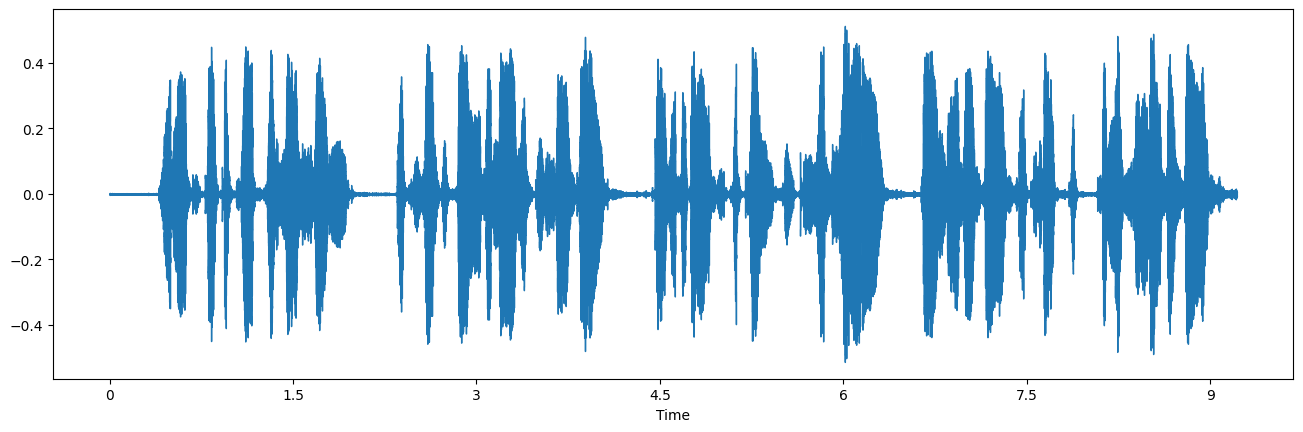

In [31]:
# 파형 시각화
array = third_item['audio']['array']
sr = third_item['audio']['sampling_rate']

plt.figure().set_figwidth(16)
librosa.display.waveshow(array, sr=sr)

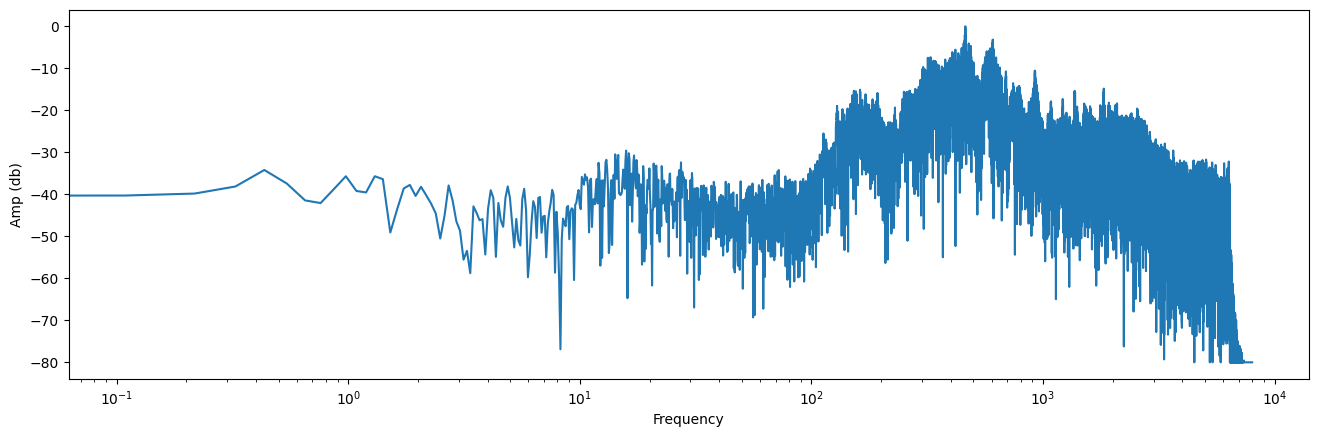

In [32]:
# 주파수 시각화

# DFT 생성
window = np.hanning(len(array))
windowed_input = array * window
dft = np.fft.rfft(windowed_input)

# 진폭 계산
amp = np.abs(dft)
amp_db = librosa.amplitude_to_db(amp, ref=np.max)

# 주파수 빈즈 생성
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(array))

plt.figure().set_figwidth(16)
plt.plot(frequency, amp_db)
plt.xlabel("Frequency")
plt.ylabel("Amp (db)")
plt.xscale("log")

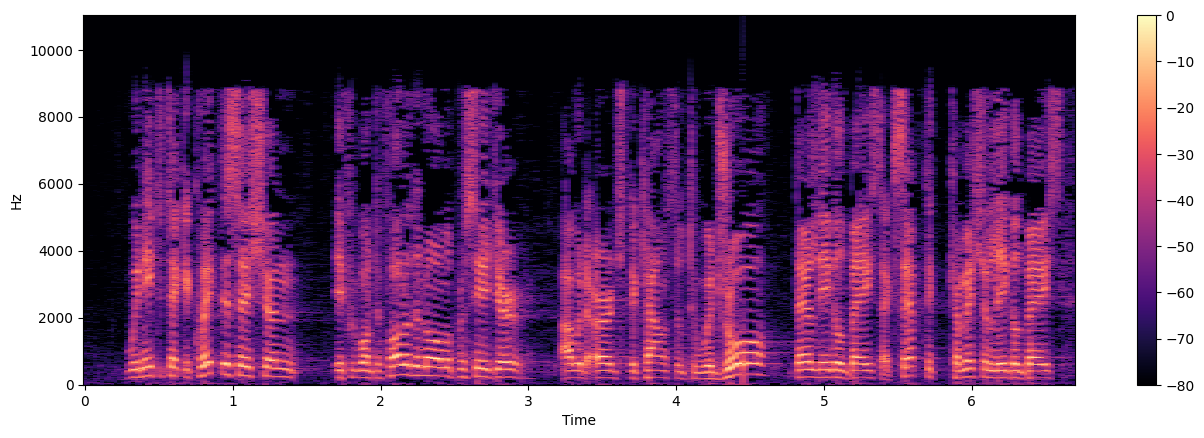

In [34]:
# 스펙토그램 시각화
stft = librosa.stft(array)
s_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

plt.figure().set_figwidth(16)
librosa.display.specshow(s_db, x_axis="time", y_axis="hz")
plt.colorbar()

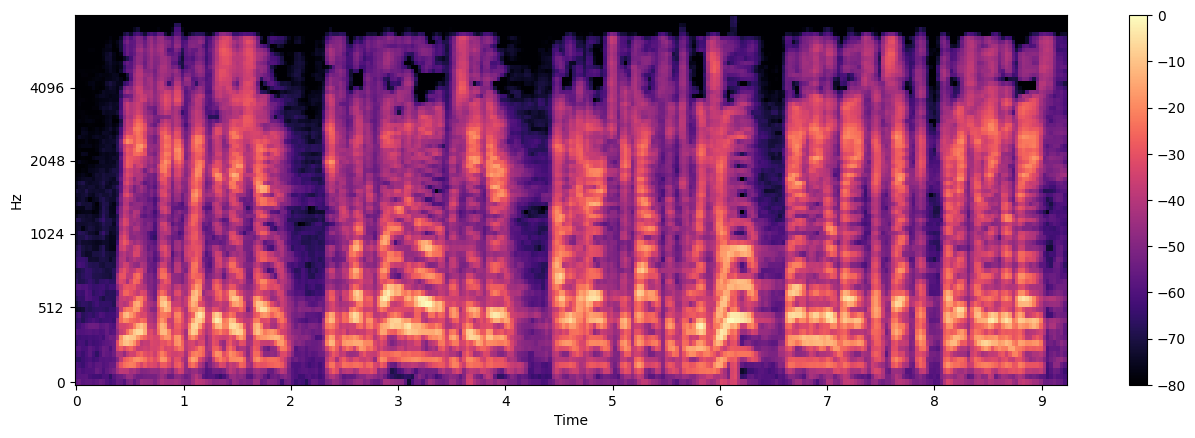

In [38]:
# 멜 스펙토그램 시각화
mel_s = librosa.feature.melspectrogram(y=array, sr=sr, n_mels=80, fmax=8000)
mel_s_db = librosa.power_to_db(mel_s, ref=np.max)

plt.figure().set_figwidth(16)
librosa.display.specshow(mel_s_db, x_axis="time", y_axis="mel", sr=sr, fmax=8000)
plt.colorbar()

In [41]:
# asr 파이프라인 객체 생성
my_asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cpu


In [42]:
# 결과 비교
print(my_asr(array))
print(third_item["text"])

{'text': 'WE NEED TO TAKE A QUICK DECISION IF WE WANT TO FOLLOW THE NORMAL PROCEDURE I WOULD URGE THE COUNCIL TO WITHDRAW THEIR LEGAL BASE EXCEPT THE COMMISSION LEGAL BASE'}
we need to take a quick decision. if we want to follow the normal procedure i would urge the council to withdraw its legal basis and to accept the commission's legal basis.
